### Data 620 - Week 8 Assignment 
### Bikram Barua and Leticia Salazar
### March 19, 2023

### Task:

Please answer the following questions in an IPython Notebook, posted to GitHub:

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

#### Import Libraries

Below are the libraies we will be using for this assignment.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import nltk.corpus
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
import seaborn as sns
#import plotly.express as px

### Corpus of Interest:

The corpus of interest for this assignment was picked from the NLTK library called `The Inaugural Address`. First we import the NLTK book and view which text would the inaugural address be. We see it's in text4 and proceed to download it. 

In [2]:
# importing NLTK book
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
# downloading the inaugural address corpus:
#from nltk.corpus import inaugural
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/letisalba/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

Let's dig into what inaugural addresses are there in text4. We notice we have about 60 texts in this file. We can analyze the 1821 Monroe address and the 2021 Biden address to check how much these speeches have changed in 200 years.

In [4]:
# getting the texts available in this corpus
nltk.corpus.inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

Let's dig into the 1821 Monroe inaugural address; we can view the complete text, in words, in sentences, or in paragraphs

In [5]:
# view the 1821 Monroe inaugural
inaugural.raw('1821-Monroe.txt')

"Fellow citizens, I shall not attempt to describe the grateful emotions which the new and very distinguished proof of the confidence of my fellow citizens, evinced by my reelection to this high trust, has excited in my bosom. The approbation which it announces of my conduct in the preceding term affords me a consolation which I shall profoundly feel through life. The general accord with which it has been expressed adds to the great and never-ceasing obligations which it imposes. To merit the continuance of this good opinion, and to carry it with me into my retirement as the solace of advancing years, will be the object of my most zealous and unceasing efforts.\n\nHaving no pretensions to the high and commanding claims of my predecessors, whose names are so much more conspicuously identified with our Revolution, and who contributed so preeminently to promote its success, I consider myself rather as the instrument than the cause of the union which has prevailed in the late election In su

In [6]:
inaugural.words('1821-Monroe.txt')

['Fellow', 'citizens', ',', 'I', 'shall', 'not', ...]

In [7]:
inaugural.sents('1821-Monroe.txt') 

[['Fellow', 'citizens', ',', 'I', 'shall', 'not', 'attempt', 'to', 'describe', 'the', 'grateful', 'emotions', 'which', 'the', 'new', 'and', 'very', 'distinguished', 'proof', 'of', 'the', 'confidence', 'of', 'my', 'fellow', 'citizens', ',', 'evinced', 'by', 'my', 'reelection', 'to', 'this', 'high', 'trust', ',', 'has', 'excited', 'in', 'my', 'bosom', '.'], ['The', 'approbation', 'which', 'it', 'announces', 'of', 'my', 'conduct', 'in', 'the', 'preceding', 'term', 'affords', 'me', 'a', 'consolation', 'which', 'I', 'shall', 'profoundly', 'feel', 'through', 'life', '.'], ...]

In [8]:
inaugural.paras('1821-Monroe.txt')

[[['Fellow', 'citizens', ',', 'I', 'shall', 'not', 'attempt', 'to', 'describe', 'the', 'grateful', 'emotions', 'which', 'the', 'new', 'and', 'very', 'distinguished', 'proof', 'of', 'the', 'confidence', 'of', 'my', 'fellow', 'citizens', ',', 'evinced', 'by', 'my', 'reelection', 'to', 'this', 'high', 'trust', ',', 'has', 'excited', 'in', 'my', 'bosom', '.'], ['The', 'approbation', 'which', 'it', 'announces', 'of', 'my', 'conduct', 'in', 'the', 'preceding', 'term', 'affords', 'me', 'a', 'consolation', 'which', 'I', 'shall', 'profoundly', 'feel', 'through', 'life', '.'], ['The', 'general', 'accord', 'with', 'which', 'it', 'has', 'been', 'expressed', 'adds', 'to', 'the', 'great', 'and', 'never', '-', 'ceasing', 'obligations', 'which', 'it', 'imposes', '.'], ['To', 'merit', 'the', 'continuance', 'of', 'this', 'good', 'opinion', ',', 'and', 'to', 'carry', 'it', 'with', 'me', 'into', 'my', 'retirement', 'as', 'the', 'solace', 'of', 'advancing', 'years', ',', 'will', 'be', 'the', 'object', 'of'

And now the 2021 Biden address; we will also view it raw, in words, in sentences and in paragraphs.

In [9]:
# viewing 2021 Biden inaugural address
inaugural.raw('2021-Biden.txt') 

'Chief Justice Roberts, Vice President Harris, Speaker Pelosi, Leader Schumer, Leader McConnell, Vice President Pence, and my distinguished guests, and my fellow Americans: This is America\'s day. This is democracy\'s day, a day of history and hope, of renewal and resolve. Through a crucible for the ages America has been tested anew, and America has risen to the challenge.\n\nToday we celebrate the triumph not of a candidate, but of a cause, the cause of democracy. The peopleâ\x80\x94the will of the people has been heard, and the will of the people has been heeded. We\'ve learned again that democracy is precious, democracy is fragile. And at this hour, my friends, democracy has prevailed.\n\nSo now, on this hallowed ground where just a few days ago violence sought to shake the Capitol\'s very foundation, we come together as one Nation under God, indivisible, to carry out the peaceful transfer of power as we have for more than two centuries. As we look ahead in our uniquely American way

In [10]:
inaugural.words('2021-Biden.txt')

['Chief', 'Justice', 'Roberts', ',', 'Vice', ...]

In [11]:
inaugural.sents('2021-Biden.txt') 

[['Chief', 'Justice', 'Roberts', ',', 'Vice', 'President', 'Harris', ',', 'Speaker', 'Pelosi', ',', 'Leader', 'Schumer', ',', 'Leader', 'McConnell', ',', 'Vice', 'President', 'Pence', ',', 'and', 'my', 'distinguished', 'guests', ',', 'and', 'my', 'fellow', 'Americans', ':', 'This', 'is', 'America', "'", 's', 'day', '.'], ['This', 'is', 'democracy', "'", 's', 'day', ',', 'a', 'day', 'of', 'history', 'and', 'hope', ',', 'of', 'renewal', 'and', 'resolve', '.'], ...]

In [12]:
inaugural.paras('2021-Biden.txt')

[[['Chief', 'Justice', 'Roberts', ',', 'Vice', 'President', 'Harris', ',', 'Speaker', 'Pelosi', ',', 'Leader', 'Schumer', ',', 'Leader', 'McConnell', ',', 'Vice', 'President', 'Pence', ',', 'and', 'my', 'distinguished', 'guests', ',', 'and', 'my', 'fellow', 'Americans', ':', 'This', 'is', 'America', "'", 's', 'day', '.'], ['This', 'is', 'democracy', "'", 's', 'day', ',', 'a', 'day', 'of', 'history', 'and', 'hope', ',', 'of', 'renewal', 'and', 'resolve', '.'], ['Through', 'a', 'crucible', 'for', 'the', 'ages', 'America', 'has', 'been', 'tested', 'anew', ',', 'and', 'America', 'has', 'risen', 'to', 'the', 'challenge', '.']], [['Today', 'we', 'celebrate', 'the', 'triumph', 'not', 'of', 'a', 'candidate', ',', 'but', 'of', 'a', 'cause', ',', 'the', 'cause', 'of', 'democracy', '.'], ['The', 'peopleâ', '\x80\x94', 'the', 'will', 'of', 'the', 'people', 'has', 'been', 'heard', ',', 'and', 'the', 'will', 'of', 'the', 'people', 'has', 'been', 'heeded', '.'], ['We', "'", 've', 'learned', 'again', 

Based on these inaugural addresses, there's punctuation in the text that we have to remove these in order to get a more accurate count for the actual words. The `isalpha()` method checks whether the string consists of alphabetic characters only.

In [13]:
# assigning the 1821 Monroe address to analyze
monroe = nltk.Text(nltk.corpus.inaugural.words('1821-Monroe.txt'))

# strip punctuation and numerics using isalpha() method
monroe = [w for w in monroe if w.isalpha()]

# strip out stop words
monroe = [w for w in monroe if w not in stopwords.words('english')]

In [14]:
# assigning the 1821 Biden address to analyze
biden = nltk.Text(nltk.corpus.inaugural.words('2021-Biden.txt'))

# strip punctuation and numerics using isalpha() method
biden = [w for w in biden if w.isalpha()]

# strip out stop words
biden = [w for w in biden if w not in stopwords.words('english')]

### Unique Words:

For each of the text we will count the total number of words and the unique words as well. While doing so we will answer the following question:

* How many unique words represent half of the total words in the corpus?

In [15]:
# total number of values in the Monroe address
len(monroe)

2161

In [16]:
# total number of values in the Biden address
len(biden)

1365

In [17]:
# total number of unique values in the Monroe address
monroe_unique = set(monroe)
len(monroe_unique)

1144

In [18]:
# total number of unique values in the Biden address
biden_unique = set(biden)
len(biden_unique)

723

In [19]:
# total words in both inaugural addresses
len(inaugural.words(['1821-Monroe.txt', '2021-Biden.txt']))

8013

### Visualization:

Let's identify the 200 highest frequency words in the corpus and plot.

In [20]:
# build the frequency distribution using FreqDist() for both texts
freq_monroe = nltk.FreqDist(monroe)
freq_biden = nltk.FreqDist(biden)

We start with Monroe's inaugural address:

In [21]:
# make a dataframe to produce relative frequencies Monroe's top 200
monroe_top200 = pd.DataFrame(freq_monroe.most_common(200),columns=['word','count'])
monroe_top200['rel_freq'] = monroe_top200['count']/float(len(monroe))
monroe_top200.head(10)

,word,count,rel_freq
0,I,26,0.012031
1,The,25,0.011569
2,great,25,0.011569
3,States,20,0.009255
4,would,18,0.008329
5,United,16,0.007404
6,war,16,0.007404
7,citizens,15,0.006941
8,may,15,0.006941
9,made,15,0.006941


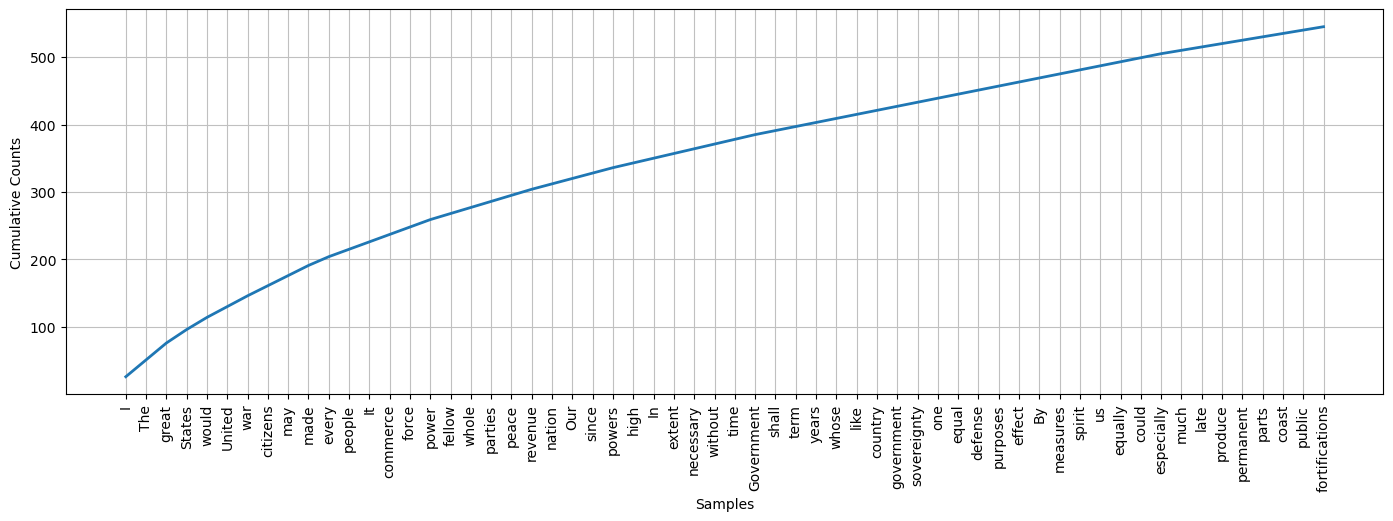

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [22]:
# plotting the frequency of the words in the Monroe speech
plt.figure(figsize=(17,5))
# plotting the first 60 words with a cumulative distribution
freq_monroe.plot(60, cumulative = True)

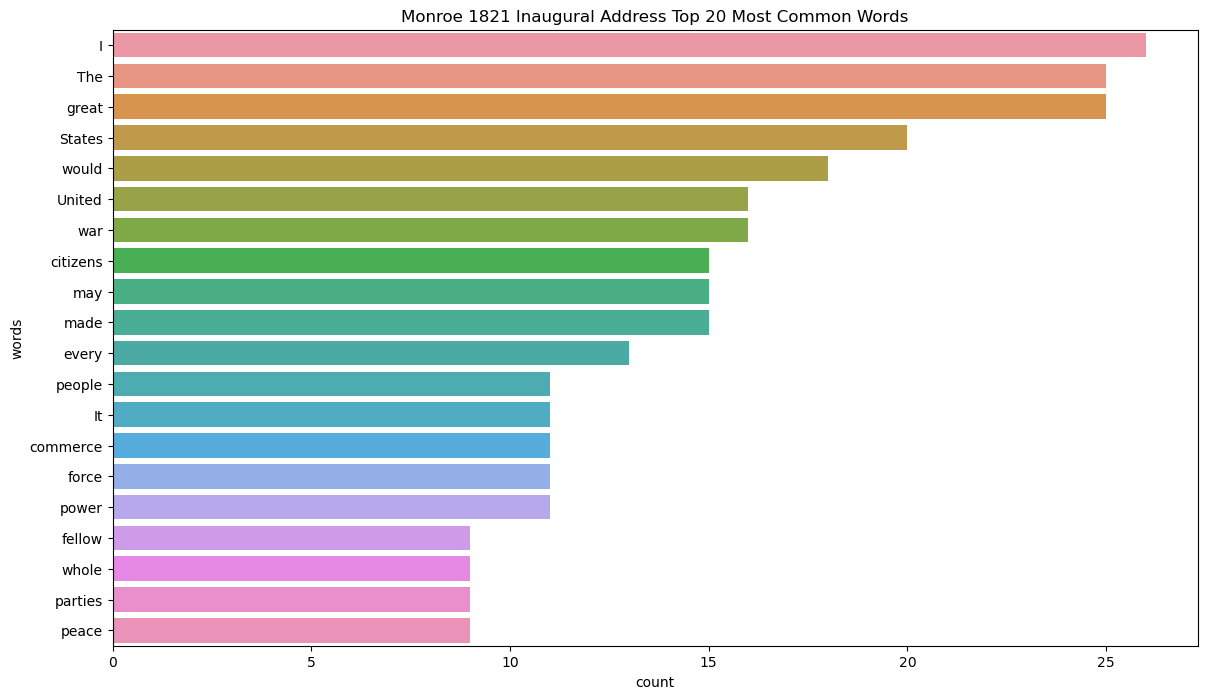

In [23]:
# preparing the dataframe again but for the top 20 words
monroe_top20 = pd.DataFrame(freq_monroe.most_common(20),columns=['word','count'])
monroe_top20['rel_freq'] = monroe_top20['count']/float(len(monroe))

# visualizing most common 20 from the 200 words
plt.figure(figsize=(14,8))
ax = sns.barplot(y=monroe_top20['word'],x=monroe_top20['count'])
ax.set(xlabel='count', ylabel='words', title='Monroe 1821 Inaugural Address Top 20 Most Common Words')
plt.show()

And now Biden's inaugural address:

In [24]:
# make a dataframe to produce relative frequencies for Biden's top 200
biden_top200 = pd.DataFrame(freq_biden.most_common(200),columns=['word','count'])
biden_top200['rel_freq'] = biden_top200['count']/float(len(monroe))
biden_top200.head(10)

,word,count,rel_freq
0,I,44,0.020361
1,We,25,0.011569
2,And,25,0.011569
3,us,24,0.011106
4,America,20,0.009255
5,one,14,0.006478
6,Nation,13,0.006016
7,democracy,11,0.005090
8,Americans,10,0.004627
9,much,10,0.004627


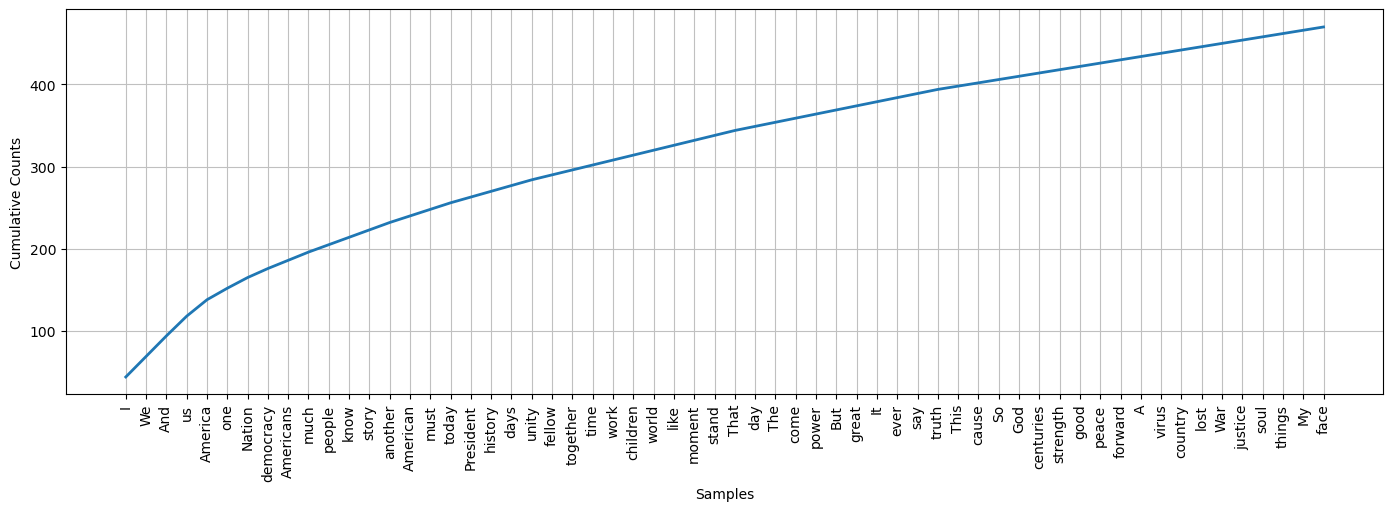

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [25]:
# plotting the frequency of the words in the Biden speech
plt.figure(figsize=(17,5))
# plotting the first 60 words with a cumulative distribution
freq_biden.plot(60, cumulative = True)

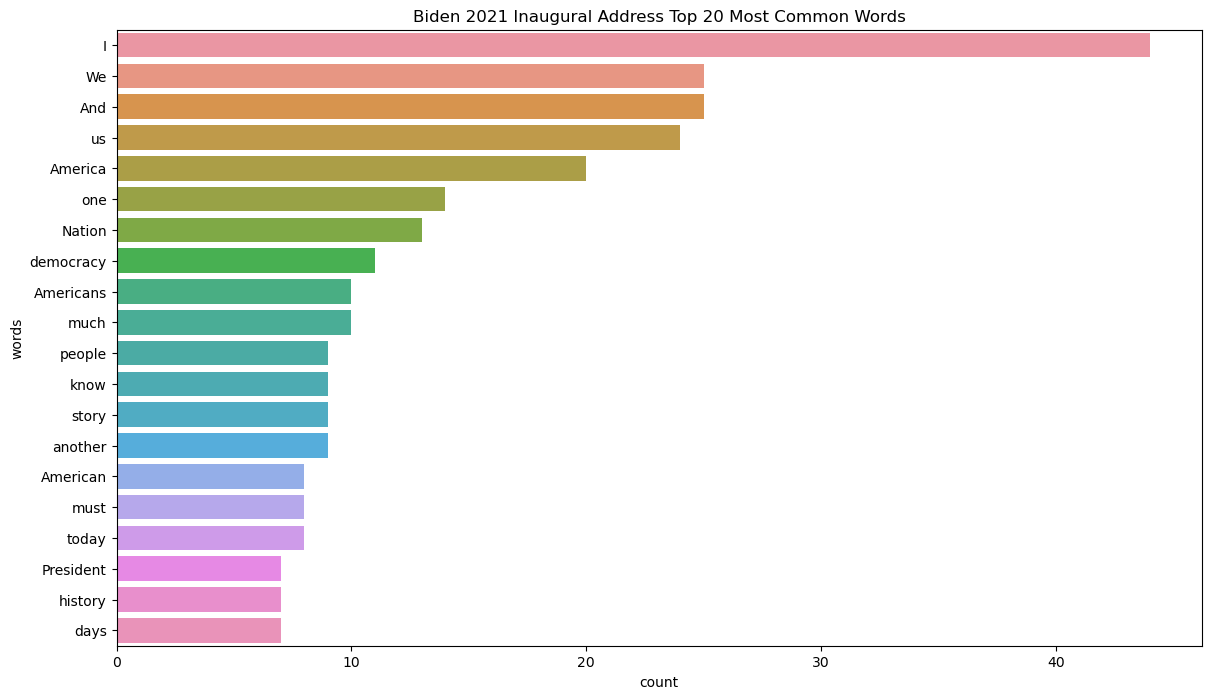

In [26]:
# preparing the dataframe again but for the top 20 words
biden_top20 = pd.DataFrame(freq_biden.most_common(20),columns=['word','count'])
biden_top20['rel_freq'] = biden_top20['count']/float(len(monroe))

# visualizing most common 20 from the 200 words
plt.figure(figsize=(14,8))
ax = sns.barplot(y=biden_top20['word'],x=biden_top20['count'])
ax.set(xlabel='count', ylabel='words', title='Biden 2021 Inaugural Address Top 20 Most Common Words')
plt.show()

Based on the barplots, these inaugural addresses contain different top 20 word counts. For instance, both speeches, we have `I` ranking 

### Zipf's Law

#### References:
* Sample usage for corpus. NLTK. (2023, January 2). Retrieved March 16, 2023, from https://www.nltk.org/howto/corpus.html 

* Python String isalpha() Method. Python string isalpha() method. (n.d.). Retrieved March 18, 2023, from https://www.w3schools.com/python/ref_string_isalpha.asp 

* Using histograms to plot a cumulative distribution#. Using histograms to plot a cumulative distribution - Matplotlib 3.7.1 documentation. (n.d.). Retrieved March 18, 2023, from https://matplotlib.org/stable/gallery/statistics/histogram_cumulative.html 